# Credit Card Fraud Detection II 

### Loading libraries 

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from imblearn.over_sampling import SMOTE

In [151]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.compose import ColumnTransformer 
from imblearn.pipeline import Pipeline as ImbPipeline 
from sklearn.metrics import classification_report 

### Loading data

In [27]:
df = pd.read_csv(r'C:\Users\bkt29\OneDrive\Desktop\MLE_AI\datasets\data2.csv') 

In [31]:
df.head() 

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud
0,DOCTOR,42509,3515418493460774,07/25,251,1
1,DOCTOR,80334,213134223583196,05/32,858,1
2,LAWYER,91552,4869615013764888,03/30,755,1
3,LAWYER,43623,341063356109385,01/29,160,1
4,DOCTOR,22962,4707418777543978402,11/30,102,0


### Cleaning Data

In [34]:
#Cheaking for missing values
df.isnull().sum() 

Profession            0
Income                0
Credit_card_number    0
Expiry                0
Security_code         0
Fraud                 0
dtype: int64

In [38]:
#Checking for duplicate values
df.duplicated().sum() 

0

In [50]:
#Adding Exp_Month to df
df['Exp_Month'] = df['Expiry'].str.split('/').str[0]
df.head()

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud,Exp_Month
0,DOCTOR,42509,3515418493460774,07/25,251,1,07
1,DOCTOR,80334,213134223583196,05/32,858,1,05
2,LAWYER,91552,4869615013764888,03/30,755,1,03
3,LAWYER,43623,341063356109385,01/29,160,1,01
4,DOCTOR,22962,4707418777543978402,11/30,102,0,11


In [52]:
#Adding Exp_Year to df
df['Exp_Year'] = df['Expiry'].str.split('/').str[1]
df.head() 

,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud,Exp_Month,Exp_Year
0,DOCTOR,42509,3515418493460774,07/25,251,1,07,25
1,DOCTOR,80334,213134223583196,05/32,858,1,05,32
2,LAWYER,91552,4869615013764888,03/30,755,1,03,30
3,LAWYER,43623,341063356109385,01/29,160,1,01,29
4,DOCTOR,22962,4707418777543978402,11/30,102,0,11,30


In [54]:
#Droping unnecessary columns
df.drop(columns = ['Credit_card_number', 'Expiry'], inplace = True) 
df.head() 

,Profession,Income,Security_code,Fraud,Exp_Month,Exp_Year
0,DOCTOR,42509,251,1,07,25
1,DOCTOR,80334,858,1,05,32
2,LAWYER,91552,755,1,03,30
3,LAWYER,43623,160,1,01,29
4,DOCTOR,22962,102,0,11,30


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Profession     10000 non-null  object
 1   Income         10000 non-null  int64 
 2   Security_code  10000 non-null  int64 
 3   Fraud          10000 non-null  int64 
 4   Exp_Month      10000 non-null  object
 5   Exp_Year       10000 non-null  object
dtypes: int64(3), object(3)
memory usage: 468.9+ KB


In [113]:
round(df.describe(),1)

,Income,Security_code,Fraud,Exp_Month,Exp_Year
count,10000.0,10000.0,10000.0,10000.0,10000.0
mean,49761.2,582.2,0.5,6.5,29.3
std,28837.7,398.4,0.5,3.4,2.9
min,1.0,0.0,0.0,1.0,24.0
25%,24863.8,275.0,0.0,4.0,27.0
50%,49483.0,539.5,1.0,7.0,29.0
75%,74483.0,813.2,1.0,9.0,32.0
max,99986.0,1620.6,1.0,12.0,34.0


In [58]:
df['Exp_Month'] = df['Exp_Month'].astype(int) 
df['Exp_Year'] = df['Exp_Year'].astype(int) 

### Data Exploration

<Axes: xlabel='Profession'>

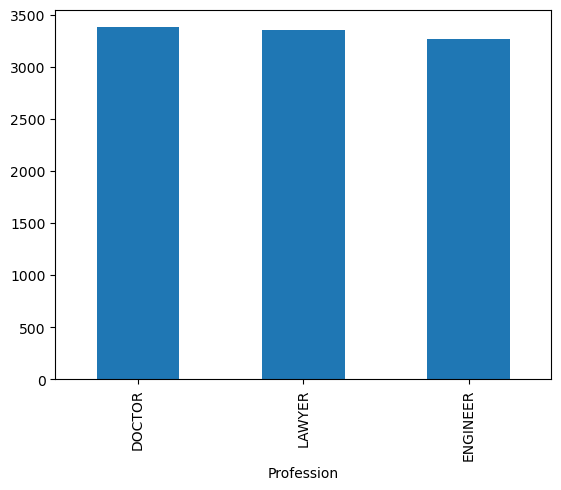

In [61]:
df['Profession'].value_counts().plot(kind = 'bar') 

<Axes: xlabel='Fraud'>

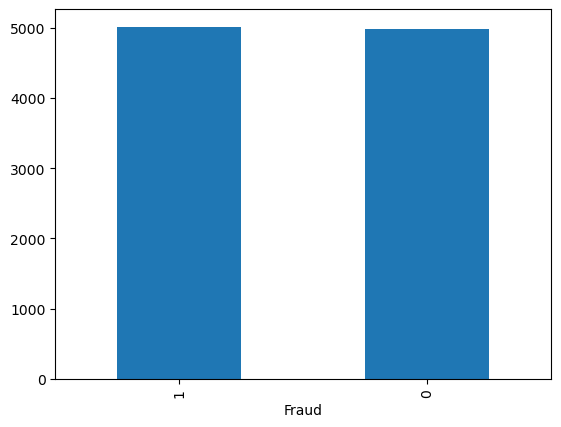

In [63]:
df['Fraud'].value_counts().plot(kind = 'bar') 

<Axes: xlabel='Exp_Month'>

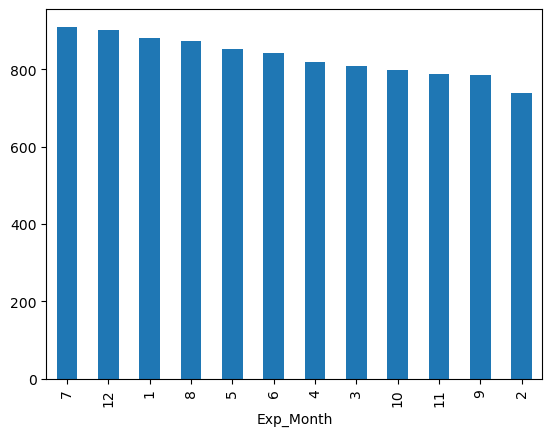

In [65]:
df['Exp_Month'].value_counts().plot(kind = 'bar') 

<Axes: xlabel='Exp_Year'>

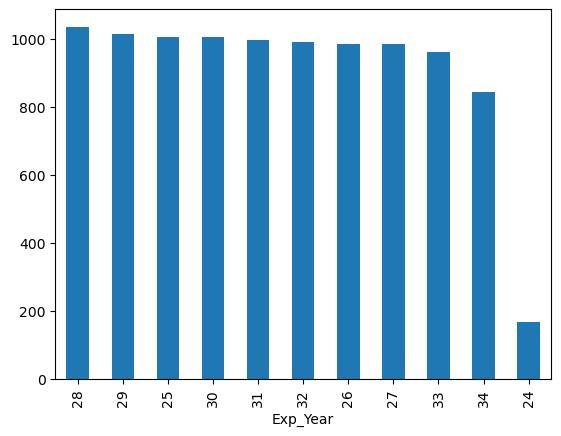

In [67]:
df['Exp_Year'].value_counts().plot(kind = 'bar') 

### Outlier Detection and Removal 

<Axes: ylabel='Exp_Year'>

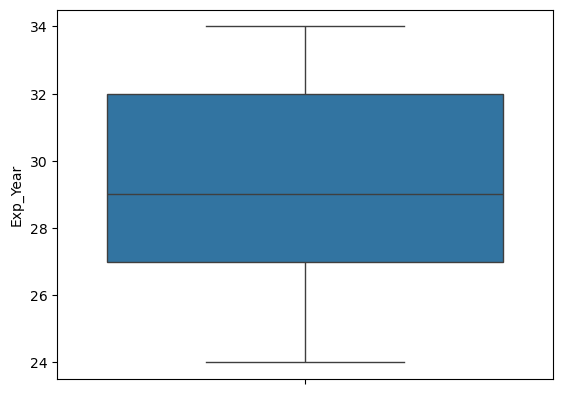

In [70]:
sns.boxplot(df['Exp_Year']) 

<Axes: ylabel='Exp_Month'>

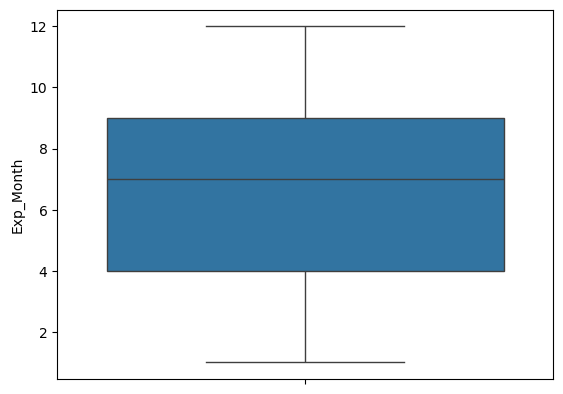

In [74]:
sns.boxplot(df['Exp_Month'])

<Axes: ylabel='Security_code'>

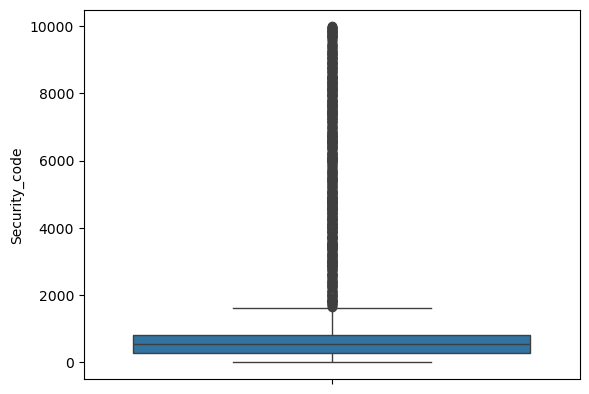

In [76]:
sns.boxplot(df['Security_code'])

In [115]:
#Removing outliers 
def remove_outliers_iqr(df, column_name): 
    #Calculate Q1 (25th percentile) and Q3 (75th percentile) 
    Q1 = df['Security_code'].quantile(0.25)
    Q3 = df['Security_code'].quantile(0.75)

    #Calculate IQR 
    IQR = Q3 - Q1

    #Define lower and upper bounds for outliers 
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    #print(lower_bound, upper_bound) 

    #Capping the values to the lower and upper bounds 
    df['Security_code'] = df['Security_code'].clip(lower = lower_bound, upper = upper_bound) 

    return df 

df = remove_outliers_iqr(df, 'security_code') 

-532.375 1620.625


In [103]:
df.shape

(10000, 6)

<Axes: ylabel='Security_code'>

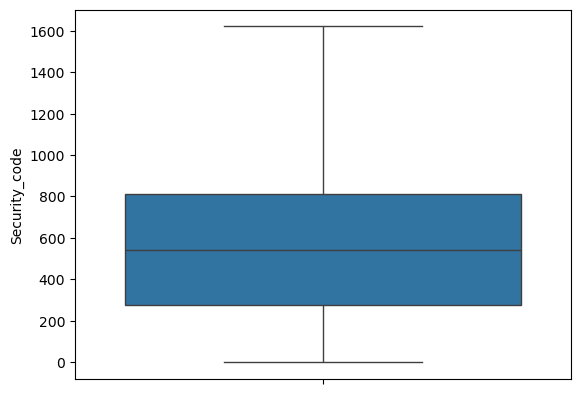

In [105]:
sns.boxplot(df['Security_code'])

<Axes: ylabel='Income'>

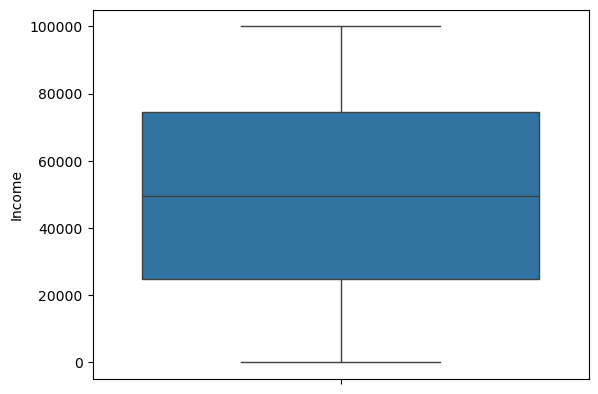

In [78]:
sns.boxplot(df['Income'])

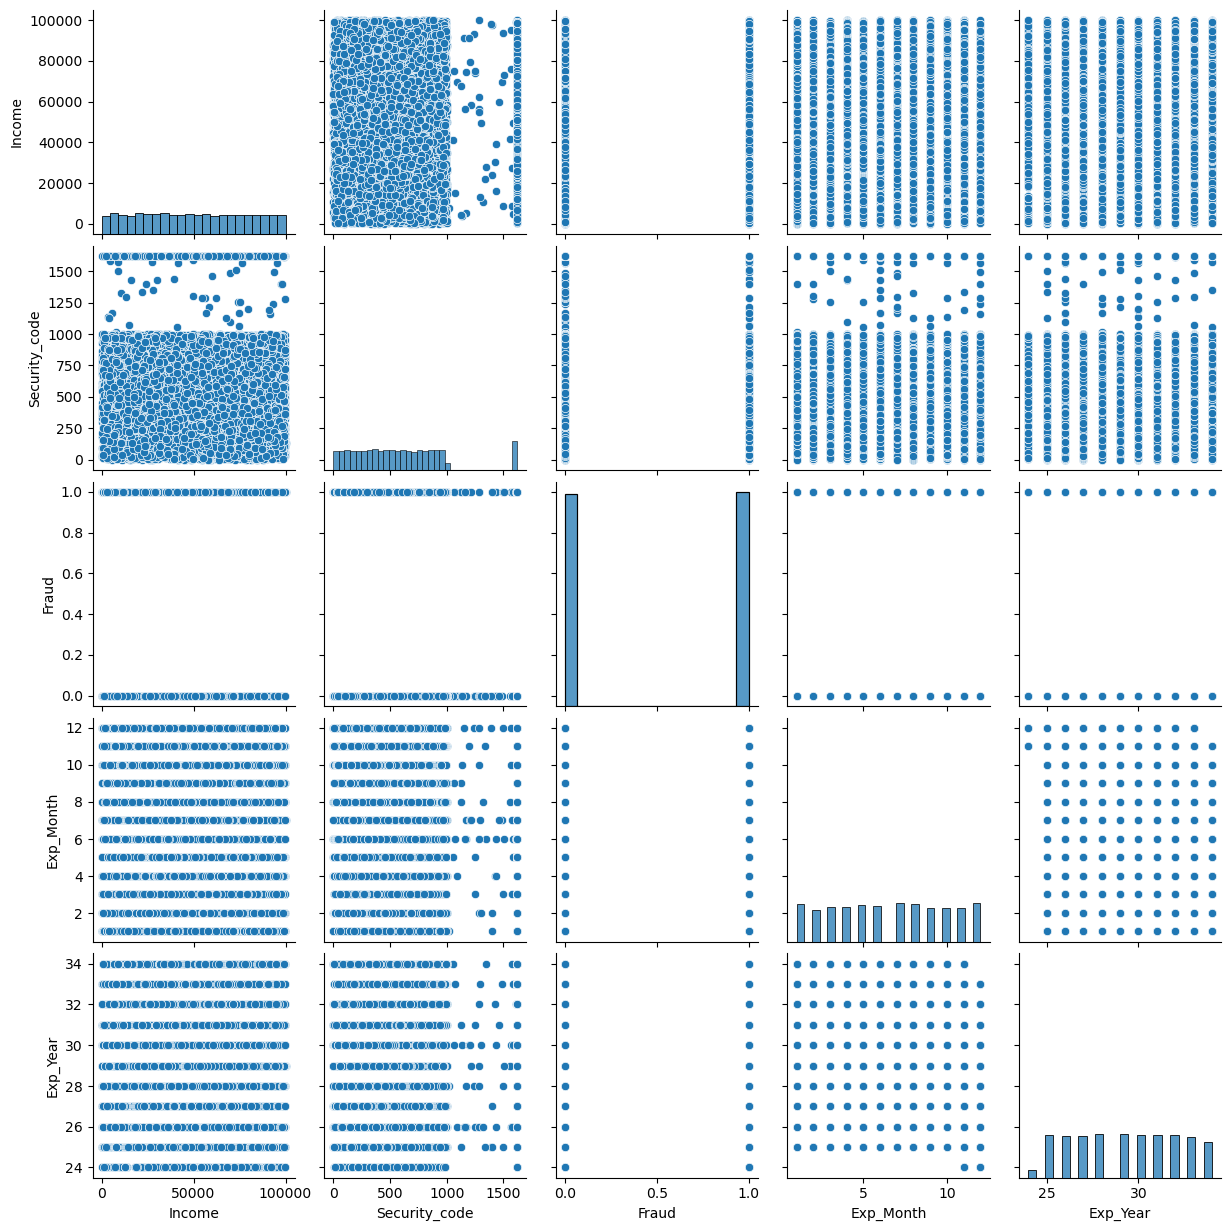

In [117]:
sns.pairplot(df) 

In [82]:
df['Security_code'] = df['Security_code'].astype(int)

In [84]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Profession     10000 non-null  object
 1   Income         10000 non-null  int64 
 2   Security_code  10000 non-null  int32 
 3   Fraud          10000 non-null  int64 
 4   Exp_Month      10000 non-null  int32 
 5   Exp_Year       10000 non-null  int32 
dtypes: int32(3), int64(2), object(1)
memory usage: 351.7+ KB


### ML - Logistic Regression For Binary Classification

In [119]:
#Classifing columns 
categorical_cols = ['Profession'] 
numerical_cols = ['Income', 'Security_code', 'Exp_Month', 'Exp_Year'] 

In [123]:
#Splitting data
X = df.drop('Fraud', axis = 1) 
y = df['Fraud'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 

In [131]:
#Preprocessing 
preprocessor = ColumnTransformer(
    transformers = [('num', StandardScaler(), numerical_cols), ('cat', OrdinalEncoder(), categorical_cols) 
                  ]
)

In [141]:
#Pipeline Creation 
model = ImbPipeline(steps = [
    ('preprocessor', preprocessor), 
    ('smote', SMOTE(random_state = 42)), 
    ('classifier', LogisticRegression(random_state = 42)) 
]) 

model.fit(X_train, y_train) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Income', 'Security_code',
                                                   'Exp_Month', 'Exp_Year']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['Profession'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', LogisticRegression(random_state=42))])

In [153]:
#Model Metrics 
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.49      0.50      0.50      1476
           1       0.51      0.49      0.50      1524

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000

